In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define Real-time Image Augmentation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),        # Random horizontal flipping
    transforms.RandomRotation(30),            # Random rotation (30 degrees)
    transforms.RandomResizedCrop(224),        # Random resize crop to a fixed size (224x224)
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.RandomVerticalFlip(),          # Random vertical flipping
    transforms.ToTensor(),                    # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

In [3]:
# Step 2: Define Dataset and Dataloader
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

100%|██████████| 170M/170M [00:02<00:00, 63.7MB/s]


In [4]:
# Step 3: Create a Custom CNN Architecture
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()

        # Adjust the input size for the fully connected layer based on the image dimensions
        # Output of conv3 and pooling layer: [batch_size, 128, 28, 28]
        self.fc1 = nn.Linear(128 * 28 * 28, 512)  # Corrected size based on the flattened output
        self.fc2 = nn.Linear(512, 10)  # 10 classes for CIFAR-10

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Apply conv1 and pooling
        x = self.pool(self.relu(self.conv2(x)))  # Apply conv2 and pooling
        x = self.pool(self.relu(self.conv3(x)))  # Apply conv3 and pooling

        # Debug: print the output shape after each layer to track the size
        print(f"Shape after conv3 and pooling: {x.shape}")

        x = x.view(x.size(0), -1)  # Flatten the tensor (batch_size, features)

        # Debug: print the flattened shape before passing to fc layers
        print(f"Flattened shape: {x.shape}")

        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
# Step 4: Instantiate the Model, Loss Function, and Optimizer
model = CustomCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# Step 5: Train the Model
epochs = 5
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {100 * correct / total}%")

Streaming output truncated to the last 5000 lines.
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and pooling: torch.Size([32, 128, 28, 28])
Flattened shape: torch.Size([32, 100352])
Shape after conv3 and 

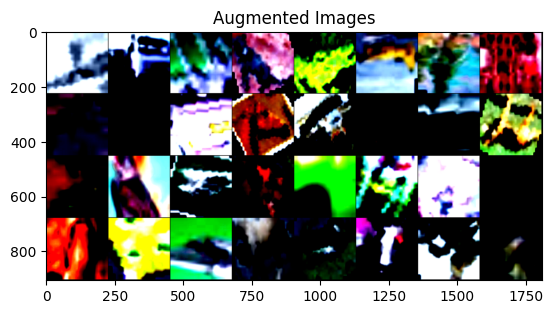

In [7]:
def show_augmented_images():
    # Load a batch of images
    data_iter = iter(train_loader)
    images, _ = next(data_iter)

    # Convert images to numpy for visualization
    grid = torchvision.utils.make_grid(images)
    plt.imshow(grid.permute(1, 2, 0))
    plt.title("Augmented Images")
    plt.show()

show_augmented_images()